# AR1 noise on v(y) for twin ITCZ detection
### Windmiller and Stevens QJ review 

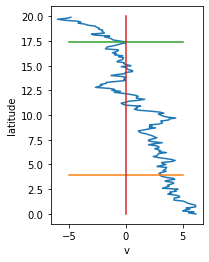

In [372]:
import numpy as np
import matplotlib.pyplot as plt

NY = 200 # size of y array, tenths of a degree from 0 
VMEAN = 1 # m/s
DIV = -0.5 # m/s per degree
NOISE_MAG = 1
acor = 0.9 # (point to point AR1 correlation)
k = 0.5 # fraction of vmax that defines c_south

y = (np.arange(NY))/10. # degrees, sort of 

vdiv = DIV*(y-np.mean(y))

# Make noise: weighted sum of random and previous; clip off first 100 values for spinup 
noise = np.random.randn(100+NY)
for i in range(len(noise)-1): 
    noise[i+1] = noise[i+1]*(acor-1) + acor*noise[i]
noise = noise[100:]/np.std(noise)


# Construct synthetic data 
v = vdiv + NOISE_MAG*noise + VMEAN

# Measure the convergence zones 
c_north = y[  np.max(np.where(v > 0)) ]
c_south = y[  np.min(np.where(v < k*np.max(v))) ]

plt.subplot(121)
plt.plot(v,y); plt.xlabel('v'), plt.ylabel('latitude')
plt.plot([-5,5],[c_south,c_south])
plt.plot([-5,5],[c_north,c_north])
plt.plot([0,0],[0,20])



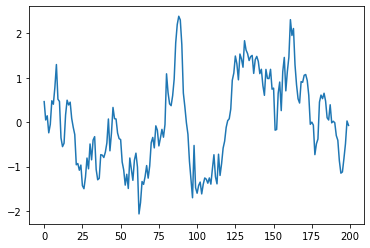

In [347]:
plt.plot(noise)